<a href="https://colab.research.google.com/github/en-ashay/Geolocation/blob/master/occlusion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
from __future__ import print_function

import numpy as np
import keras

from keras.datasets import mnist
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Flatten, Activation, Input
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

batch_size = 128
num_classes = 10
epochs = 5

# input image dimensions
img_rows, img_cols = 28, 28

# the data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax', name='preds'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

11493376/11490434 [==============================] - 2s 0us/step
x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 4s 63us/step - loss: 0.2432 - accuracy: 0.9257 - val_loss: 0.0524 - val_accuracy: 0.9830
Epoch 2/5
60000/60000 [==============================] - 3s 56us/step - loss: 0.0864 - accuracy: 0.9741 - val_loss: 0.0386 - val_accuracy: 0.9863
Epoch 3/5
60000/60000 [==============================] - 3s 56us/step - loss: 0.0649 - accuracy: 0.9805 - val_loss: 0.0325 - val_accuracy: 0.9889
Epoch 4/5
60000/60000 [==============================] - 3s 57us/step - loss: 0.0528 - accuracy: 0.9845 - val_loss: 0.0302 - val_accuracy: 0.9903
Epoch 5/5
60000/60000 [==============================] - 3s 57us/step - loss: 0.0431 - accuracy: 0.9864 - val_loss: 0.0291 - val_accuracy: 0.9909
Test loss: 0.029086138103739723
Test accuracy: 0.9908999800682068


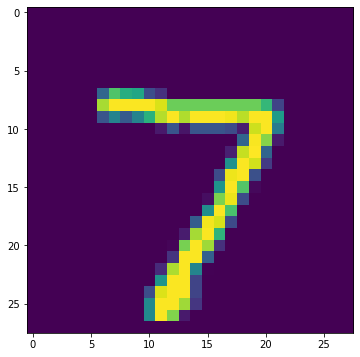

In [17]:

class_idx = 7
indices = np.where(y_test[:, class_idx] == 1.)[0]

# pick some random input from here.
idx = indices[0]

# Lets sanity check the picked image.
from matplotlib import pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (18, 6)

plt.imshow(x_test[idx][..., 0])

In [18]:

from vis.visualization import visualize_saliency
from vis.utils import utils
from keras import activations

# Utility to search for layer index by name. 
# Alternatively we can specify this as -1 since it corresponds to the last layer.
layer_idx = utils.find_layer_idx(model, 'preds')

# Swap softmax with linear
model.layers[layer_idx].activation = activations.linear
model = utils.apply_modifications(model)

grads = visualize_saliency(model, layer_idx, filter_indices=class_idx, seed_input=x_test[idx])
# Plot with 'jet' colormap to visualize as a heatmap.
plt.imshow(grads, cmap='jet')

ImportError: ignored

In [19]:
#importing required modules
from keras.applications import VGG16
#loading the saved model
#we are using the complete architecture thus include_top=True
model = VGG16(weights='imagenet',include_top=True)
#show the summary of model
model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [20]:
#creating a mapping of layer name ot layer details 
#we will create a dictionary layers_info which maps a layer name to its charcteristics
layers_info = {}
for i in model.layers:
    layers_info[i.name] = i.get_config()

#here the layer_weights dictionary will map every layer_name to its corresponding weights
layer_weights = {}
for i in model.layers:
    layer_weights[i.name] = i.get_weights()
(layers_info['block5_conv1'])

{'activation': 'relu',
 'activity_regularizer': None,
 'bias_constraint': None,
 'bias_initializer': {'class_name': 'Zeros', 'config': {}},
 'bias_regularizer': None,
 'data_format': 'channels_last',
 'dilation_rate': (1, 1),
 'dtype': 'float32',
 'filters': 512,
 'kernel_constraint': None,
 'kernel_initializer': {'class_name': 'VarianceScaling',
  'config': {'distribution': 'uniform',
   'mode': 'fan_avg',
   'scale': 1.0,
   'seed': None}},
 'kernel_regularizer': None,
 'kernel_size': (3, 3),
 'name': 'block5_conv1',
 'padding': 'same',
 'strides': (1, 1),
 'trainable': True,
 'use_bias': True}

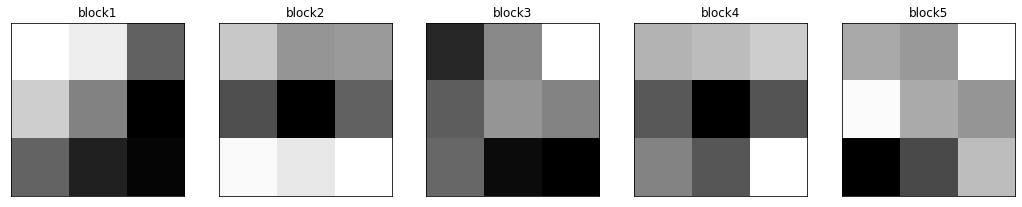

In [21]:
layers = model.layers
layer_ids = [1,4,7,11,15]
#plot the filters
fig,ax = plt.subplots(nrows=1,ncols=5)
for i in range(5):
    ax[i].imshow(layers[layer_ids[i]].get_weights()[0][:,:,:,0][:,:,0],cmap='gray')
    ax[i].set_title('block'+str(i+1))
    ax[i].set_xticks([])
    ax[i].set_yticks([])

In [22]:
from vis.visualization import visualize_activation
from vis.utils import utils
from keras import activations
from keras import applications
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (18,6)
#creating a VGG16 model using fully connected layers also because then we can 
#visualize the patterns for individual category
from keras.applications import VGG16
model = VGG16(weights='imagenet',include_top=True)

#finding out the layer index using layer name
#the find_layer_idx function accepts the model and name of layer as parameters and return the index of respective layer
layer_idx = utils.find_layer_idx(model,'predictions')
#changing the activation of the layer to linear
model.layers[layer_idx].activation = activations.linear
#applying modifications to the model
model = utils.apply_modifications(model)
#Indian elephant
img3 = visualize_activation(model,layer_idx,filter_indices=385,max_iter=5000,verbose=True)
plt.imshow(img3)

ImportError: ignored

In [5]:
!pip install imresize

ERROR: Could not find a version that satisfies the requirement imresize (from versions: none)
ERROR: No matching distribution found for imresize


In [0]:
import numpy as np

from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Activation, Conv2D, MaxPooling2D
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.preprocessing.image import ImageDataGenerator
from keras.activations import relu

%matplotlib inline
import matplotlib.pyplot as plt
def iter_occlusion(image, size=8):

    occlusion = np.full((size * 5, size * 5, 1), [0.5], np.float32)
    occlusion_center = np.full((size, size, 1), [0.5], np.float32)
    occlusion_padding = size * 2

    # print('padding...')
    image_padded = np.pad(image, ( \
                        (occlusion_padding, occlusion_padding), (occlusion_padding, occlusion_padding), (0, 0) \
                        ), 'constant', constant_values = 0.0)

    for y in range(occlusion_padding, image.shape[0] + occlusion_padding, size):

        for x in range(occlusion_padding, image.shape[1] + occlusion_padding, size):
            tmp = image_padded.copy()

            tmp[y - occlusion_padding:y + occlusion_center.shape[0] + occlusion_padding, \
                x - occlusion_padding:x + occlusion_center.shape[1] + occlusion_padding] \
                = occlusion

            tmp[y:y + occlusion_center.shape[0], x:x + occlusion_center.shape[1]] = occlusion_center

            yield x - occlusion_padding, y - occlusion_padding, \
                  tmp[occlusion_padding:tmp.shape[0] - occlusion_padding, occlusion_padding:tmp.shape[1] - occlusion_padding]

Text(0.5, 1.0, 'ORIGINAL IMAGE')

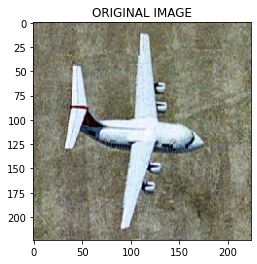

In [24]:
from keras.preprocessing.image import load_img
# load an image from file
image = load_img('unnamed.jpg', target_size=(224, 224))
plt.imshow(image)
plt.title('ORIGINAL IMAGE')

(224, 224, 3)
0 0 0  -  (224, 224, 3)
14 0 1  -  (224, 224, 3)
28 0 2  -  (224, 224, 3)
42 0 3  -  (224, 224, 3)
56 0 4  -  (224, 224, 3)
70 0 5  -  (224, 224, 3)
84 0 6  -  (224, 224, 3)
98 0 7  -  (224, 224, 3)
112 0 8  -  (224, 224, 3)
126 0 9  -  (224, 224, 3)
140 0 10  -  (224, 224, 3)
154 0 11  -  (224, 224, 3)
168 0 12  -  (224, 224, 3)
182 0 13  -  (224, 224, 3)
196 0 14  -  (224, 224, 3)
210 0 15  -  (224, 224, 3)
0 14 16  -  (224, 224, 3)
14 14 17  -  (224, 224, 3)
28 14 18  -  (224, 224, 3)
42 14 19  -  (224, 224, 3)
56 14 20  -  (224, 224, 3)
70 14 21  -  (224, 224, 3)
84 14 22  -  (224, 224, 3)
98 14 23  -  (224, 224, 3)
112 14 24  -  (224, 224, 3)
126 14 25  -  (224, 224, 3)
140 14 26  -  (224, 224, 3)
154 14 27  -  (224, 224, 3)
168 14 28  -  (224, 224, 3)
182 14 29  -  (224, 224, 3)
196 14 30  -  (224, 224, 3)
210 14 31  -  (224, 224, 3)
0 28 32  -  (224, 224, 3)
14 28 33  -  (224, 224, 3)
28 28 34  -  (224, 224, 3)
42 28 35  -  (224, 224, 3)
56 28 36  -  (224, 224, 3)


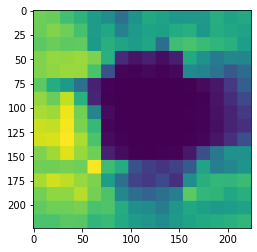

In [25]:
from keras.preprocessing.image import img_to_array
from keras.applications.vgg16 import preprocess_input
# convert the image pixels to a numpy array
image = img_to_array(image)
# reshape data for the model
image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
# prepare the image for the VGG model
image = preprocess_input(image)
# predict the probability across all output classes
yhat = model.predict(image)
temp = image[0]
print(temp.shape)
heatmap = np.zeros((224,224))
correct_class = np.argmax(yhat)
for n,(x,y,image) in enumerate(iter_occlusion(temp,14)):
    heatmap[x:x+14,y:y+14] = model.predict(image.reshape((1, image.shape[0], image.shape[1], image.shape[2])))[0][correct_class]
    print(x,y,n,' - ',image.shape)
heatmap1 = heatmap/heatmap.max()
plt.imshow(heatmap)

Low image data range; displaying image with stretched contrast.


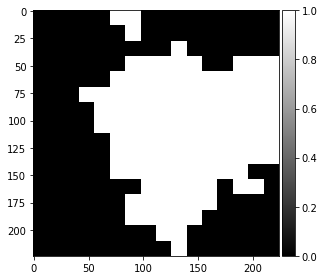

In [33]:

import skimage.io as io
#creating mask from the standardised heatmap probabilities
mask = heatmap1 < 0.5
mask1 = mask *256
mask = mask.astype(int)
io.imshow(mask,cmap='gray')

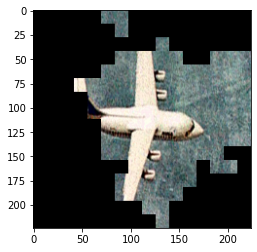

In [34]:
import cv2
#read the image
image = cv2.imread('unnamed.jpg')
image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
#resize image to appropriate dimensions
image = cv2.resize(image,(224,224))
mask = mask.astype('uint8')
#apply the mask to the image
final = cv2.bitwise_and(image,image,mask = mask)
final = cv2.cvtColor(final,cv2.COLOR_BGR2RGB)
#plot the final image
plt.imshow(final)

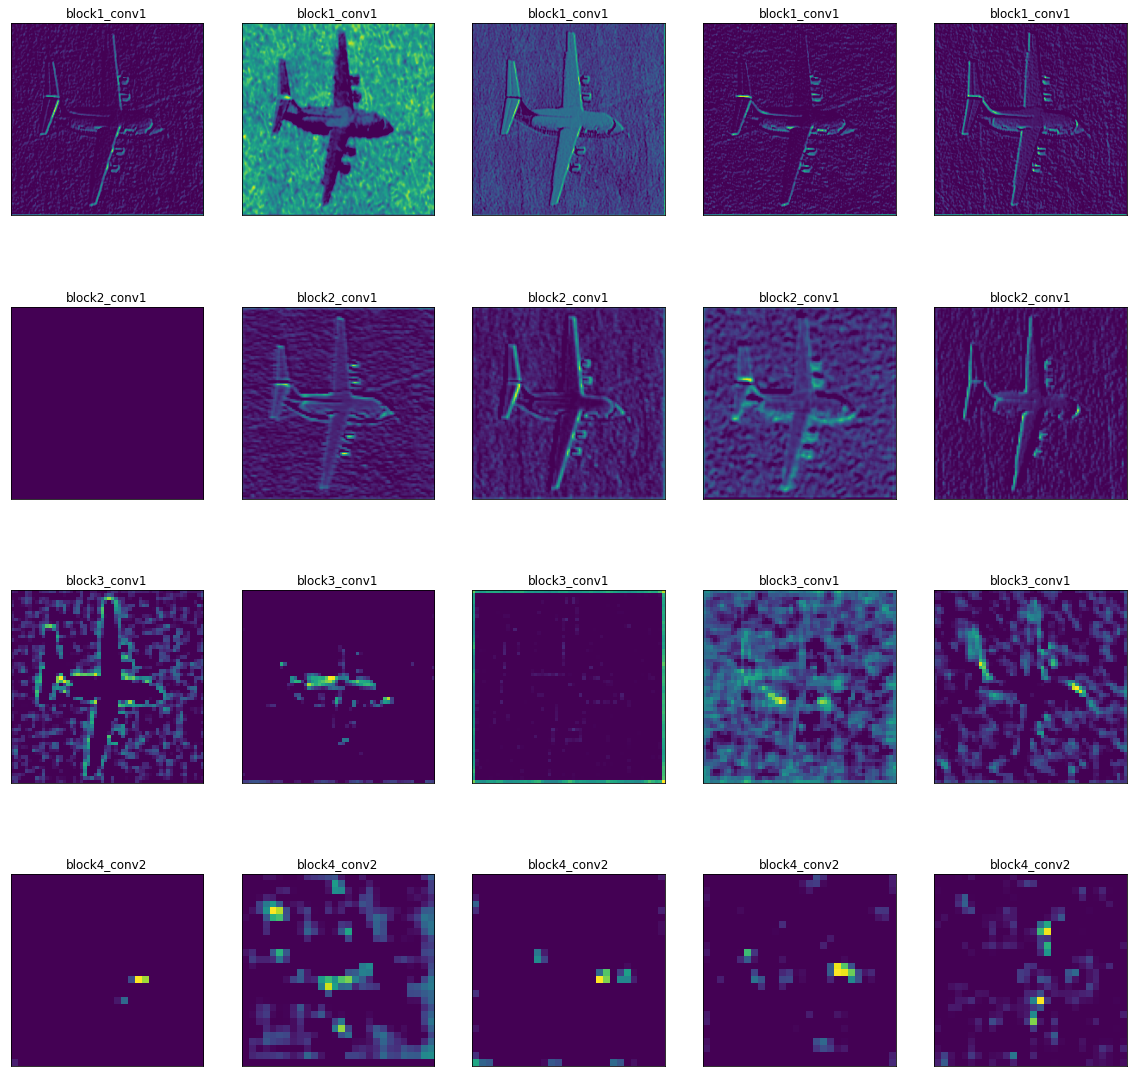

In [35]:
#importing required libraries and functions
from keras.models import Model
#defining names of layers from which we will take the output
layer_names = ['block1_conv1','block2_conv1','block3_conv1','block4_conv2']
outputs = []
image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
#extracting the output and appending to outputs
for layer_name in layer_names:
    intermediate_layer_model = Model(inputs=model.input,outputs=model.get_layer(layer_name).output)
    intermediate_output = intermediate_layer_model.predict(image)
    outputs.append(intermediate_output)
#plotting the outputs
fig,ax = plt.subplots(nrows=4,ncols=5,figsize=(20,20))

for i in range(4):
    for z in range(5):
        ax[i][z].imshow(outputs[i][0,:,:,z])
        ax[i][z].set_title(layer_names[i])
        ax[i][z].set_xticks([])
        ax[i][z].set_yticks([])
plt.savefig('layerwise_output.jpg')